In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import math
from scipy import special #comb, factorial
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline

In [2]:
df = pd.read_csv('Groceries_dataset.csv')

In [3]:
df.head(4)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df.duplicated().sum()

759

In [7]:
df[df.duplicated()]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [8]:
df['itemDescription'].nunique()

167

In [9]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [10]:
df1 = df.copy()

In [11]:
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df1['Date'] = df1['Date'].dt.day

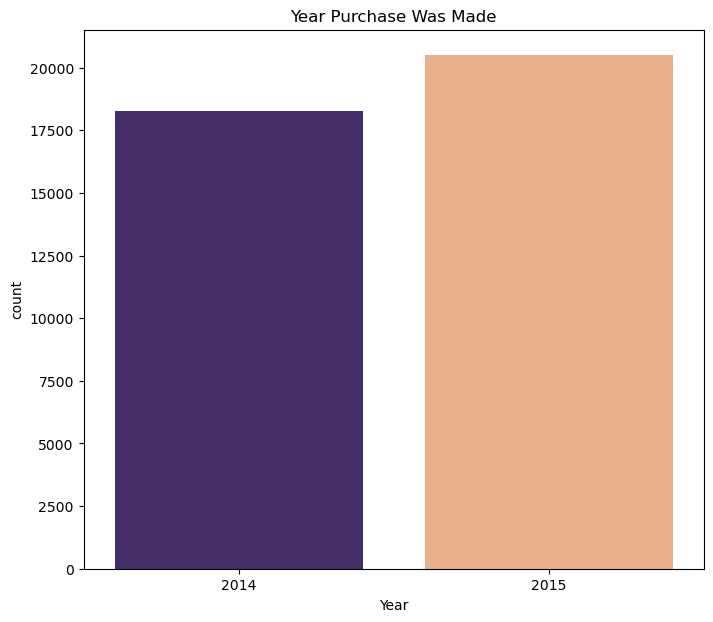

In [30]:
plt.figure(figsize=(8,7))
sns.countplot(x=df['Date'].dt.year, data=df1, palette=['#432371',"#FAAE7B"])
plt.title('Year Purchase Was Made')
plt.xlabel('Year')
plt.show()

In [13]:
df1['Date'].duplicated().sum()

38734

In [14]:
df1 = df1[['Member_number','itemDescription', 'Date', 'Month', 'Year']]

In [22]:
df1.head(1)

,Member_number,itemDescription,Date,Month,Year
0,1808,tropical fruit,21,7,2015


In [15]:
df2 = df1.copy()

In [16]:
df2.columns = ['Id', 'Item', 'Day', 'Month', 'Year']

In [17]:
df2.head(4)

,Id,Item,Day,Month,Year
0,1808,tropical fruit,21,7,2015
1,2552,whole milk,5,1,2015
2,2300,pip fruit,19,9,2015
3,1187,other vegetables,12,12,2015


In [19]:
df2 = df1.groupby(['Year','Month']).count().reset_index()aa

<Figure size 1000x700 with 0 Axes>

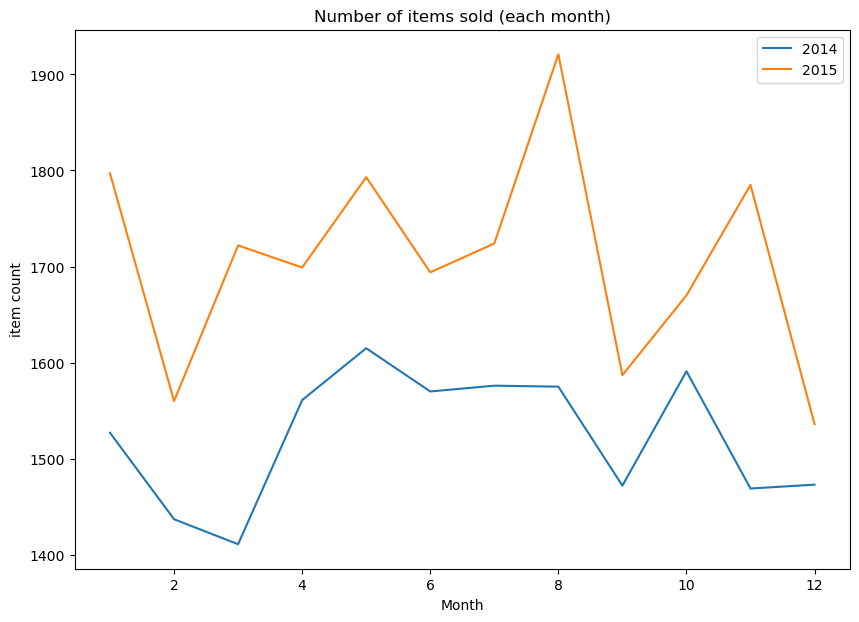

In [24]:
plt.figure(figsize=(10,7))
d_2014 = df2[df2['Year'] == 2014]
d_2015 = df2[df2['Year'] == 2015]
plt.figure(figsize=(10,7))
plt.plot(d_2014['Month'],d_2014['itemDescription'],label='2014')
plt.plot(d_2015['Month'],d_2015['itemDescription'],label='2015')
plt.title('Number of items sold (each month)')
plt.xlabel('Month')
plt.ylabel('item count')
plt.legend()
plt.show()

In [28]:
df2.head(1)

,Year,Month,Member_number,itemDescription,Date
0,2014,1,1527,1527,1527


In [27]:
df3 = df2.groupby('itemDescription').count().reset_index()
df2.drop(columns=['Day','Month','Year'], inplace=True)
df2.columns = ['Item', 'Sales']
df2 = df2.sort_values('Sales', ascending=False).reset_index()

KeyError: "['Day'] not found in axis"

In [ ]:
df3.describe()

In [ ]:
fig = px.bar(df3.head(7),
             x='Item',
             y='Sales',
             title= 'Most purchased items')
fig.show()
fig = px.bar(df3.tail(7),
             x='Item',
             y='Sales',
             title= 'Least purchased items')

fig.show()

In [ ]:
df1

In [ ]:
df1[df1['Id'] == 1000].sort_values(by='Year').head(3)
